# Direct Detection of Exoplanets

Simple notebook to support the computations presented in the course
Exoplanets: Populations, Atmospheres, and Formation

Direct detection computations

Leonardo Testi - Oct 2023

In [41]:
import numpy as np
from astropy.modeling.physical_models import BlackBody as Bnu
import astropy.units as u
from astropy.table import Table
from copy import copy

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline



mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.linewidth'] = 1.2

mpl.rcParams['xtick.major.width'] = 1.
mpl.rcParams['xtick.minor.width'] = 0.56
mpl.rcParams['ytick.major.width'] = 1.
mpl.rcParams['ytick.minor.width'] = 0.56

mpl.rcParams['xtick.major.size'] = 8.
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8.
mpl.rcParams['ytick.minor.size'] = 4

mpl.rcParams['xtick.major.pad'] = 4
mpl.rcParams['ytick.major.pad'] = 4

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['legend.frameon'] = False


## Create Solar System planet instances

Here we create the instances for some of the Solar System planets

In [2]:
import sys
sys.path.append('./../')
from ExoClass import Sun, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune
from ExoClass import Jupiter5, Jupiter10


## Contrast of Solar System planets

Here we plot the contrast of Solar System planets

Note the simple scaling d(arcsec) = d(AU)/D(parsec)
(where d is the distance from the central star and D is the distance from the observer), 
this formula derives directly from the definition of parsec (distance from the observer of an object that has an annual parallax of 1 arcsec).

Very handy formula to remember in Exoplanet science...

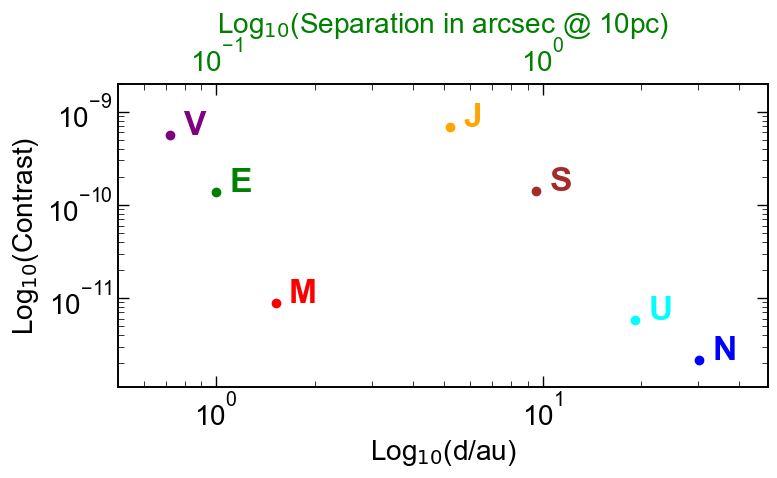

In [51]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
daoff=1.1
for p in [Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune]:
    ax.plot(p.a, p.f_refl(), 'o', color=p.color)
    ax.text(p.a*daoff, p.f_refl(), p.label, color=p.color, 
             fontweight='bold', fontsize='xx-large')

ax.set_xlim(0.5,49)
ax.set_ylim(1.1e-12,2.e-9)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Log$_{10}$(d/au)')
ax.set_ylabel('Log$_{10}$(Contrast)')

d=10
ax2 = ax.twiny()
ax2.set_xlim(0.5/d,49/d)
ax2.set_xscale('log')
ax2.set_xlabel(r'Log$_{10}$(Separation in arcsec'+' @ {0}pc)'.format(d), color='green')
ax2.tick_params(axis='x', labelcolor='green')
fig.tight_layout()

plt.savefig('f_refl_contrast_ss.pdf')

# Thermal emission 

Here we plot the contrast for the equilibrium temperature

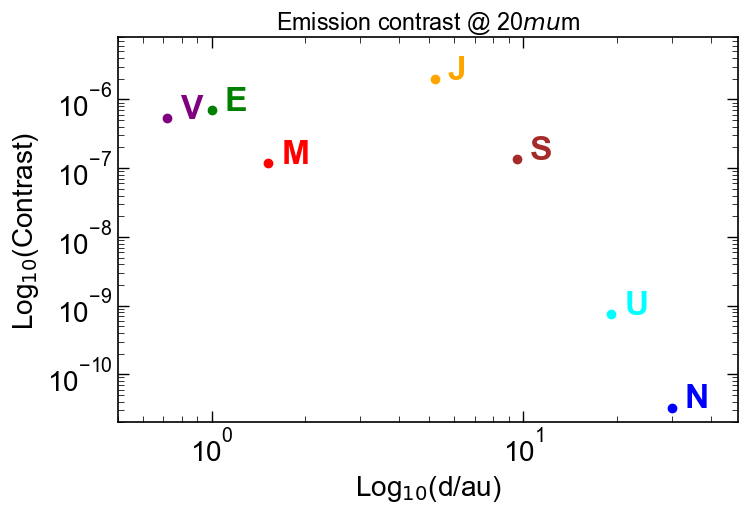

In [55]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
wl = 20
daoff=1.1
for p in [Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune]:
    ax.plot(p.a, p.f_ther(wl=wl), 'o', color=p.color)
    ax.text(p.a*daoff, p.f_ther(wl=wl), p.label, color=p.color, 
             fontweight='bold', fontsize='xx-large')

xmin=0.5
xmax=49
ymin=2e-11
ymax=8.e-6
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Log$_{10}$(d/au)')
ax.set_ylabel('Log$_{10}$(Contrast)')
ax.set_title('Emission contrast @ {0}$mu$m'.format(wl))
    
plt.savefig('f_thermal_contrast_ss.pdf')

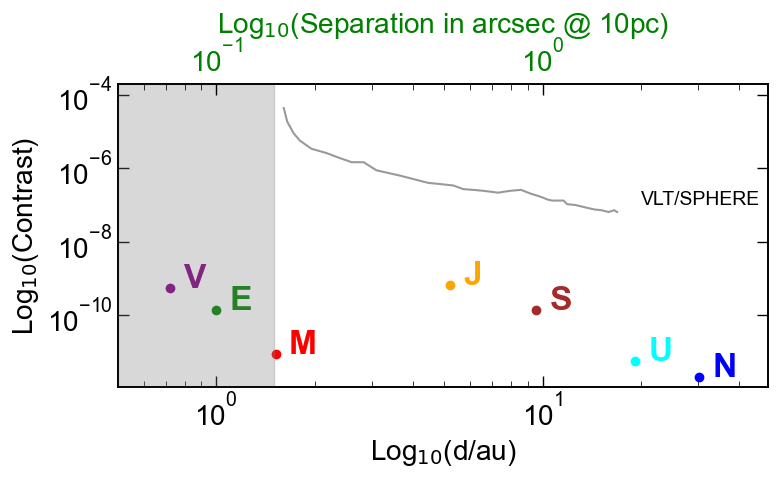

In [80]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
daoff=1.1
for p in [Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune]:
    ax.plot(p.a, p.f_refl(), 'o', color=p.color)
    ax.text(p.a*daoff, p.f_refl(), p.label, color=p.color, 
             fontweight='bold', fontsize='xx-large')

xmin=0.5
xmax=49
ymin=1.1e-12
ymax=2.e-4
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Log$_{10}$(d/au)')
ax.set_ylabel('Log$_{10}$(Contrast)')


d=10
sphere = Table.read('Sphere_sdi_adi.dat',format='ascii')

ax2 = ax.twiny()
ax2.plot(sphere['das'], 10**sphere['logc'], color='k', alpha=0.4)
ax2.text(2.,1.e-7,"VLT/SPHERE")
ax2.set_xlim(xmin/d,xmax/d)
ax2.set_xscale('log')
ax2.set_xlabel(r'Log$_{10}$(Separation in arcsec'+' @ {0}pc)'.format(d), color='green')
ax2.tick_params(axis='x', labelcolor='green')
fig.tight_layout()
ax2.fill_between([xmin/d,0.15],[ymin,ymin], [ymax,ymax], color='grey', alpha=0.3)


plt.savefig('f_sphere_detection_limits_ss.pdf')

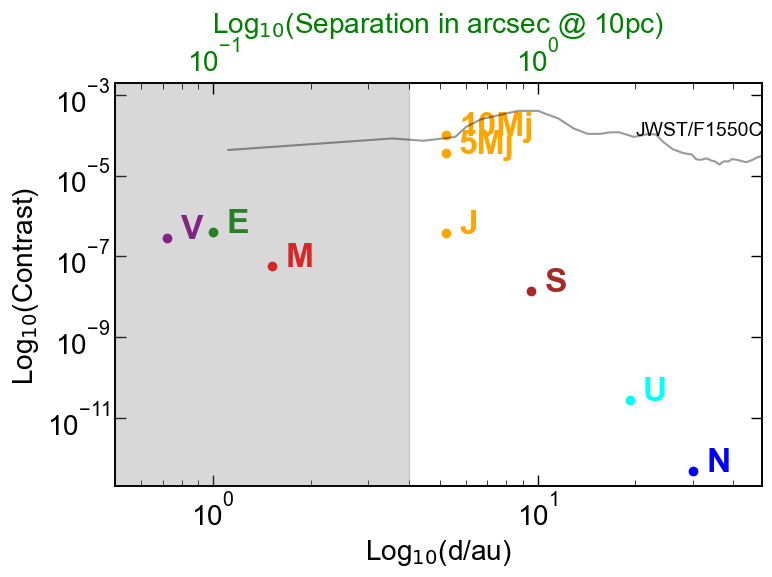

In [57]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
wl = 15.5
daoff=1.1
for p in [Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune]:
    ax.plot(p.a, p.f_ther(wl=wl), 'o', color=p.color)
    ax.text(p.a*daoff, p.f_ther(wl=wl), p.label, color=p.color, 
             fontweight='bold', fontsize='xx-large')
    
ax.plot(Jupiter5.a, Jupiter5.f_ther(wl=wl, Tpla=220.), 'o', color=Jupiter5.color)
ax.text(Jupiter5.a*daoff, Jupiter5.f_ther(wl=wl, Tpla=220.), 
        Jupiter5.label, color=Jupiter5.color, 
        fontweight='bold', fontsize='xx-large')

ax.plot(Jupiter10.a, Jupiter10.f_ther(wl=wl, Tpla=305.), 'o', color=Jupiter10.color)
ax.text(Jupiter10.a*daoff, Jupiter10.f_ther(wl=wl, Tpla=305.), 
        Jupiter10.label, color=Jupiter10.color, 
        fontweight='bold', fontsize='xx-large')

xmin = 0.5
xmax = 49
ymin = 2.e-13
ymax = 2.e-3

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Log$_{10}$(d/au)')
ax.set_ylabel('Log$_{10}$(Contrast)')

d=10
jwst = Table.read('JWST_F1550C.dat',format='ascii')

ax2 = ax.twiny()
ax2.plot(jwst['das'], 10**jwst['logc'], color='k', alpha=0.4)
ax2.text(2.,1.e-4,"JWST/F1550C")
ax2.set_xlim(xmin/d,xmax/d)
ax2.set_xscale('log')
ax2.set_xlabel(r'Log$_{10}$(Separation in arcsec'+' @ {0}pc)'.format(d), color='green')
ax2.tick_params(axis='x', labelcolor='green')
ax2.fill_between([xmin/d,0.4],[ymin,ymin], [ymax,ymax], color='grey', alpha=0.3)
fig.tight_layout()
    
plt.savefig('f_jwst_detection_limits_ss_massivejup.pdf')

# Planet evolution 

Here we add the contribution from planetary evolution

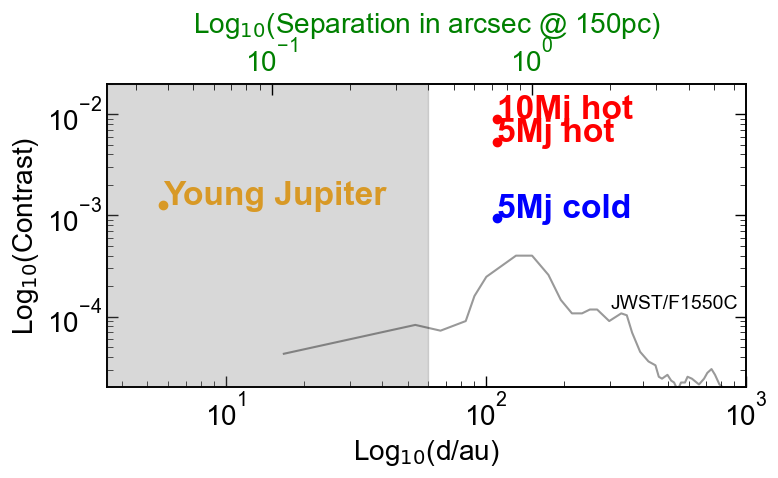

In [78]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
wl = 15.5
daoff=1.1
#for p in [Jupiter]:
#    ax.plot(p.a*daoff, p.f_ther(wl=wl), 'o', color=p.color)
#    ax.text(p.a*daoff, p.f_ther(wl=wl), p.label, color=p.color, 
#             fontweight='bold', fontsize='xx-large')

Jupiter_joung = copy(Jupiter)
#Jupiter_joung.a = 100.
Jupiter_joung.radius = Jupiter.radius*1.4
Jupiter_joung.label = 'Young Jupiter'
ax.plot(Jupiter_joung.a*daoff, Jupiter_joung.f_ther(wl=wl, Tpla=700.), 'o', color=Jupiter_joung.color)
ax.text(Jupiter_joung.a*daoff, Jupiter_joung.f_ther(wl=wl, Tpla=700.), 
        Jupiter_joung.label, color=Jupiter_joung.color, 
        fontweight='bold', fontsize='xx-large')
    
Jupiter5_joung = copy(Jupiter5)
Jupiter5_joung.a = 100.
Jupiter5_joung.radius = Jupiter.radius*1.21
Jupiter5_joung.label = '5Mj cold'
ax.plot(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=700.), 'o', color='blue')
ax.text(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=700.), 
        Jupiter5_joung.label, color='blue', 
        fontweight='bold', fontsize='xx-large')
Jupiter5_joung = copy(Jupiter5)
Jupiter5_joung.a = 100.
Jupiter5_joung.radius = Jupiter.radius*1.6
Jupiter5_joung.label = '5Mj hot'
ax.plot(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=1500.), 'o', color='red')
ax.text(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=1500.), 
        Jupiter5_joung.label, color='red', 
        fontweight='bold', fontsize='xx-large')

Jupiter10_joung = copy(Jupiter10)
Jupiter10_joung.a = 100.
Jupiter10_joung.radius = Jupiter.radius*1.5
Jupiter10_joung.label = '10Mj hot'
ax.plot(Jupiter10_joung.a*daoff, Jupiter10_joung.f_ther(wl=wl, Tpla=2500.), 'o', color='red')
ax.text(Jupiter10_joung.a*daoff, Jupiter10_joung.f_ther(wl=wl, Tpla=2500.), 
        Jupiter10_joung.label, color='red', 
        fontweight='bold', fontsize='xx-large')

xmin = 3.5
xmax = 1000.
ymin = 2.e-5
ymax = 2.e-2
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Log$_{10}$(d/au)')
ax.set_ylabel('Log$_{10}$(Contrast)')

d=150
jwst = Table.read('JWST_F1550C.dat',format='ascii')


ax2 = ax.twiny()
ax2.plot(jwst['das'], 10**jwst['logc'], color='k', alpha=0.4)
ax2.text(2.,1.2e-4,"JWST/F1550C")
ax2.set_xlim(xmin/d,xmax/d)
ax2.set_ylim(ymin,ymax)
ax2.set_xscale('log')
ax2.set_xlabel(r'Log$_{10}$(Separation in arcsec'+' @ {0}pc)'.format(d), color='green')
ax2.tick_params(axis='x', labelcolor='green')
ax2.fill_between([xmin/d,0.4],[ymin,ymin], [ymax,ymax], color='grey', alpha=0.3)
fig.tight_layout()

plt.savefig('f_jwst_detection_limits_young_massivejup.pdf')

/var/folders/lt/p2_bx3x502gcwt3tv4g_zh900004lh/T/ipykernel_2732/2894596622.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


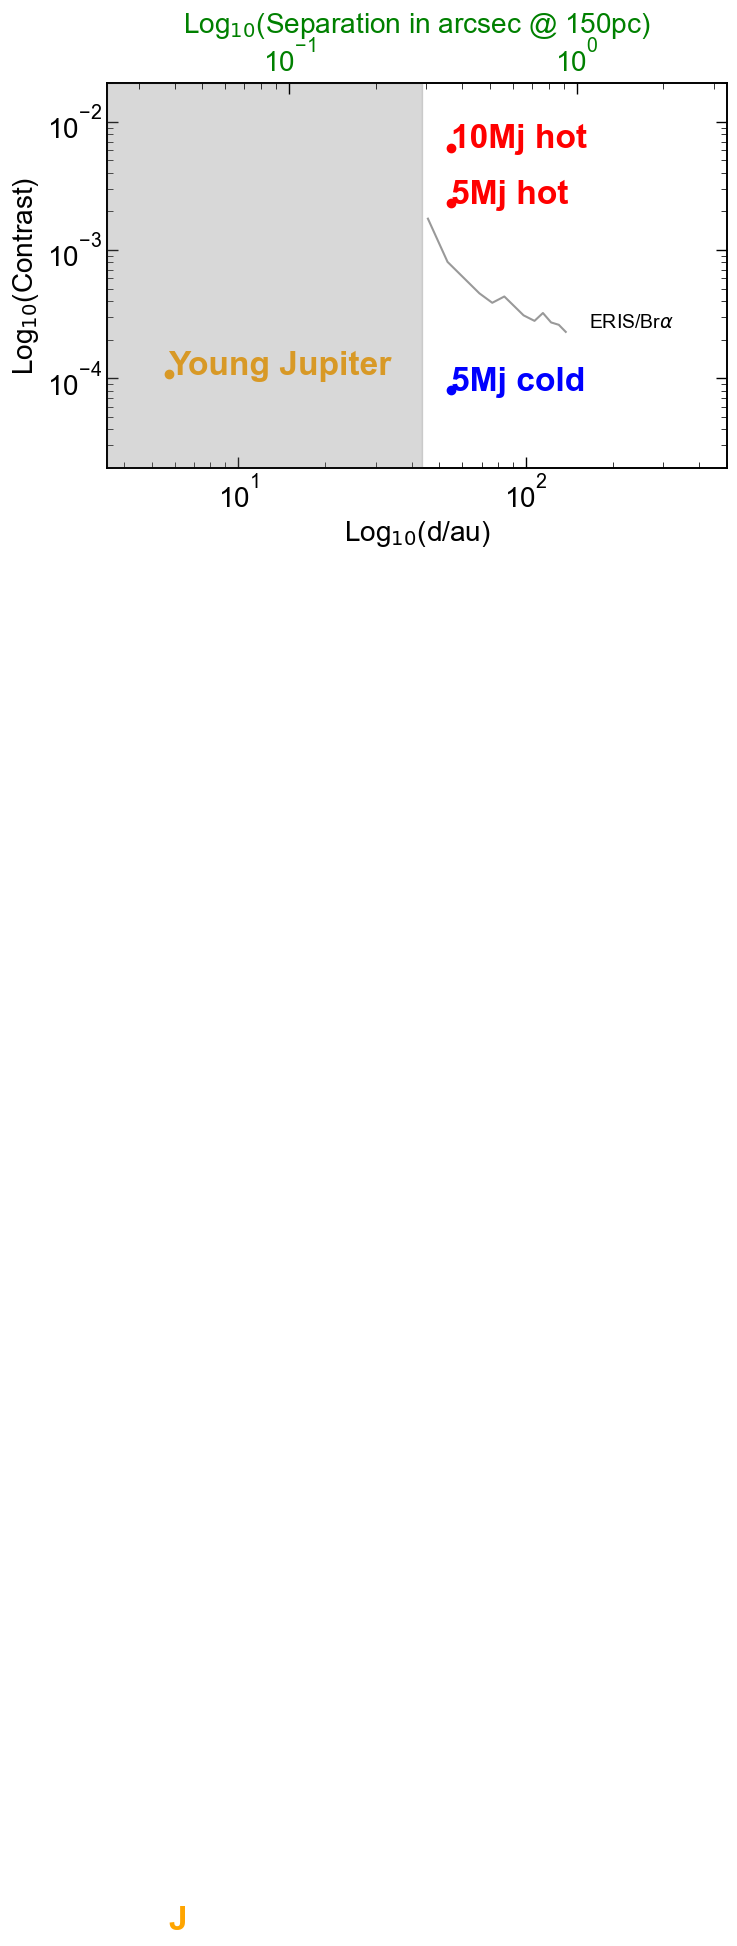

In [79]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
wl = 4.05
daoff=1.1
for p in [Jupiter]:
    ax.plot(p.a*daoff, p.f_ther(wl=wl), 'o', color=p.color)
    ax.text(p.a*daoff, p.f_ther(wl=wl), p.label, color=p.color, 
             fontweight='bold', fontsize='xx-large')

Jupiter_joung = copy(Jupiter)
#Jupiter_joung.a = 100.
Jupiter_joung.radius = Jupiter.radius*1.4
Jupiter_joung.label = 'Young Jupiter'
ax.plot(Jupiter_joung.a*daoff, Jupiter_joung.f_ther(wl=wl, Tpla=700.), 'o', color=Jupiter_joung.color)
ax.text(Jupiter_joung.a*daoff, Jupiter_joung.f_ther(wl=wl, Tpla=700.), 
        Jupiter_joung.label, color=Jupiter_joung.color, 
        fontweight='bold', fontsize='xx-large')
    
Jupiter5_joung = copy(Jupiter5)
Jupiter5_joung.a = 50.
Jupiter5_joung.radius = Jupiter.radius*1.21
Jupiter5_joung.label = '5Mj cold'
ax.plot(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=700.), 'o', color='blue')
ax.text(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=700.), 
        Jupiter5_joung.label, color='blue', 
        fontweight='bold', fontsize='xx-large')
Jupiter5_joung = copy(Jupiter5)
Jupiter5_joung.a = 50.
Jupiter5_joung.radius = Jupiter.radius*1.6
Jupiter5_joung.label = '5Mj hot'
ax.plot(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=1500.), 'o', color='red')
ax.text(Jupiter5_joung.a*daoff, Jupiter5_joung.f_ther(wl=wl, Tpla=1500.), 
        Jupiter5_joung.label, color='red', 
        fontweight='bold', fontsize='xx-large')

Jupiter10_joung = copy(Jupiter10)
Jupiter10_joung.a = 50.
Jupiter10_joung.radius = Jupiter.radius*1.5
Jupiter10_joung.label = '10Mj hot'
ax.plot(Jupiter10_joung.a*daoff, Jupiter10_joung.f_ther(wl=wl, Tpla=2500.), 'o', color='red')
ax.text(Jupiter10_joung.a*daoff, Jupiter10_joung.f_ther(wl=wl, Tpla=2500.), 
        Jupiter10_joung.label, color='red', 
        fontweight='bold', fontsize='xx-large')
#Jupiter10_joung = copy(Jupiter10)
#Jupiter10_joung.a = 50.
#Jupiter10_joung.radius = Jupiter.radius*1.15
#Jupiter10_joung.label = '10Mj cold'
#ax.plot(Jupiter10_joung.a*daoff, Jupiter10_joung.f_ther(wl=wl, Tpla=700.), 'o', color='blue')
#ax.text(Jupiter10_joung.a*daoff, Jupiter10_joung.f_ther(wl=wl, Tpla=700.), 
#        Jupiter10_joung.label, color='blue', 
#        fontweight='bold', fontsize='xx-large')

xmin = 3.5
xmax = 500.
ymin = 2.e-5
ymax = 2.e-2
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Log$_{10}$(d/au)')
ax.set_ylabel('Log$_{10}$(Contrast)')

d=150
eris = Table.read('ERIS_Bralpha.dat',format='ascii')


ax2 = ax.twiny()
ax2.plot(eris['das'], eris['logc'], color='k', alpha=0.4)
ax2.text(1.1,2.5e-4,r'ERIS/Br$\alpha$')
ax2.set_xlim(xmin/d,xmax/d)
ax2.set_ylim(ymin,ymax)
ax2.set_xscale('log')
ax2.set_xlabel(r'Log$_{10}$(Separation in arcsec'+' @ {0}pc)'.format(d), color='green')
ax2.tick_params(axis='x', labelcolor='green')
ax2.fill_between([xmin/d,0.29],[ymin,ymin], [ymax,ymax], color='grey', alpha=0.3)
fig.tight_layout()

plt.savefig('f_eris_detection_limits_young_massivejup.pdf')